> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a (TMDB 5000 Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

this data set contains information about more than 10000 movies collected from the movie database , including alot of information about these movies so we are going to discover the columns and alues in this data set

in the first step we will import the required libraries to start our data set investigation 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



## <a id='wrangling'></a>
## Data Wrangling
Load Data set into data frame using pandas
### Define
Load Data set using pandas

### Code

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_df = pd.read_csv('tmdb-movies.csv')


### Test

In [3]:
movies_df.sample(5)
movies_df.query('runtime ==0 or revenue==0 ').count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [4]:
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### information about the loaded data set:
we have 21 columns with the foollowing titles: 

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj' ] 
### Data Cleaning 

### Define
before we start the cleaning process we will copy the original data set

### Code

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_df_copy = movies_df.copy()



### Test


In [8]:
movies_df_copy.shape

(10866, 21)

In [7]:
movies_df_copy.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

#### after inveestagating the dataset we have multiple questions we will try to answer in our data analysis process :

#### 1- what are the 10 longest movies in this dataset 

#### 2- what are the top 10 years in releasing movies

#### 3- who are the top 10 directors by number of directed movies

#### 4- is there any relationship between run time and movies profit?

#### 5 - is there any relationship between vote average and movies profit ?

#### 6- what is the average rate for the released movies between 2000 and 2015 ?

#### 7- what is the average movie length for the released movies between 1900 and 2000 ?



In [7]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
movies_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

we will investigate our data for any potential issue before we start our analysis process 

In [9]:
movies_df_copy.query('budget==0 or revenue==0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.000000e+00,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.000000e+00
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.000000e+00


we will add a new column calleed profit but first we need to remove the 0 values in the revenue and budget columns

In [10]:
movies_df_copy[['budget', 'revenue']] = movies_df_copy[['budget', 'revenue']].replace(0, np.NAN)
movies_df_copy.dropna(inplace=True)


In [11]:
movies_df_copy.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [12]:
movies_df_copy.query('runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


we will add profit column which is the result of subsctracting budget from revenue 

In [13]:
movies_df_copy['profit'] = movies_df_copy['revenue'] - movies_df_copy['budget']

### Test

In [14]:
movies_df_copy[['budget','revenue','profit']].sample()

,budget,revenue,profit
1471,38000000.0,45465299.0,7465299.0


### Research Question 1  (what are the 10 longest movies in this dataset)

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

movies_df_copy.sort_values(by='vote_average' , ascending=False)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
7269,238,tt0068646,5.738034,6000000.0,2.450664e+08,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09,2.390664e+08
650,244786,tt2582802,4.780419,3300000.0,1.399309e+07,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,http://sonyclassics.com/whiplash/,Damien Chazelle,The road to greatness can take you to the edge.,...,105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07,1.069309e+07
10222,424,tt0108052,2.377288,22000000.0,3.212658e+08,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,http://www.schindlerslist.com/,Steven Spielberg,"Whoever saves one life, saves the world entire.",...,195,Drama|History|War,Universal Pictures|Amblin Entertainment,11/29/93,2632,8.1,1993,3.320834e+07,4.849410e+08,2.992658e+08
2875,155,tt0468569,8.466668,185000000.0,1.001922e+09,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09,8.169218e+08
2409,550,tt0137523,8.947905,63000000.0,1.008538e+08,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08,3.785375e+07
35,264644,tt3170832,3.557846,6000000.0,3.540176e+07,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,http://www.roomthemovie.com,Lenny Abrahamson,Love knows no boundaries,...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07,2.940176e+07
629,157336,tt0816692,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,4.567525e+08
636,205596,tt2084970,8.110711,14000000.0,2.335557e+08,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,http://theimitationgamemovie.com/,Morten Tyldum,The true enigma was the man who cracked the code.,...,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,11/14/14,3478,8.0,2014,1.289527e+07,2.151261e+08,2.195557e+08
8069,629,tt0114814,3.440238,6000000.0,2.334157e+07,The Usual Suspects,Stephen Baldwin|Gabriel Byrne|Chazz Palminteri...,http://www.mgm.com/#/our-titles/2083/The-Usual...,Bryan Singer,Five Criminals. One Line Up. No Coincidence.,...,106,Drama|Crime|Thriller,Blue Parrot Productions|Bad Hat Harry Productions,7/19/95,1942,8.0,1995,8.585801e+06,3.340101e+07,1.734157e+07
8987,73,tt0120586,1.333006,20000000.0,2.387513e+07,American History X,Edward Norton|Edward Furlong|Beverly D'Angelo|...,http://www.historyx.com/,Tony Kaye,Some Legacies Must End.,...,119,Drama,New Line Cinema|The Turman-Morrissey Company|S...,10/30/98,1563,8.0,1998,2.675391e+07,3.193765e+07,3.875127e+06


### Define
we can notice the year value in release_date column is shortened to be to numbers only 
for example : 11 instead of 2011
so we are going to change this value by removing the last 2 numbers in release date column then we will add the correct year from release year column 

### Code

In [17]:
movies_df_copy['release_date'].values[-5]


'7/5/73'

In [18]:
movies_df_copy['release_date'] = [x[:-2] for x in movies_df_copy['release_date']]
movies_df_copy.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


In [19]:
movies_df_copy['release_date'] = movies_df_copy['release_date']+movies_df_copy['release_year'].astype(str)


### Test

In [21]:
movies_df_copy['release_date'].head(10)

0      6/9/2015
1     5/13/2015
2     3/18/2015
3    12/15/2015
4      4/1/2015
5    12/25/2015
6     6/23/2015
7     9/30/2015
8     6/17/2015
9      6/9/2015
Name: release_date, dtype: object

### we will get the answer of the first question using pandas nlargest method 

In [23]:
#trial['runtime'].nlargest
movies_df_copy.nlargest(10,columns=['runtime'])

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
4949,122,tt0167260,7.122455,94000000.0,1.118889e+09,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net,Peter Jackson,The eye of the enemy is moving.,...,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,12/1/2003,5636,7.9,2003,1.114231e+08,1.326278e+09,1.024889e+09
10222,424,tt0108052,2.377288,22000000.0,3.212658e+08,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,http://www.schindlerslist.com/,Steven Spielberg,"Whoever saves one life, saves the world entire.",...,195,Drama|History|War,Universal Pictures|Amblin Entertainment,11/29/1993,2632,8.1,1993,3.320834e+07,4.849410e+08,2.992658e+08
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,1997,2.716921e+08,2.506406e+09,1.645034e+09
2414,497,tt0120689,2.719461,60000000.0,2.846000e+08,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,http://thegreenmile.warnerbros.com/,Frank Darabont,Miracles do happen.,...,189,Fantasy|Drama|Crime,Castle Rock Entertainment|Darkwoods Production...,12/10/1999,2299,8.0,1999,7.854317e+07,3.725564e+08,2.246000e+08
2469,334,tt0175880,0.682531,37000000.0,4.845180e+07,Magnolia,Julianne Moore|William H. Macy|John C. Reilly|...,http://www.magnoliamovie.com/,Paul Thomas Anderson,Things fall down. People look up. And when it ...,...,188,Drama,New Line Cinema|Ghoulardi Film Company|The Mag...,12/8/1999,430,7.3,1999,4.843496e+07,6.342597e+07,1.145180e+07
5428,106646,tt0993846,4.877927,100000000.0,3.920007e+08,The Wolf of Wall Street,Leonardo DiCaprio|Jonah Hill|Margot Robbie|Kyl...,http://www.thewolfofwallstreet.com/,Martin Scorsese,EARN. SPEND. PARTY.,...,180,Crime|Drama|Comedy,Paramount Pictures|Appian Way|EMJAG Production...,12/25/2013,4027,7.9,2013,9.360334e+07,3.669257e+08,2.920007e+08
3911,121,tt0167261,8.095275,79000000.0,9.262874e+08,The Lord of the Rings: The Two Towers,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,A New Power Is Rising.,...,179,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/2002,5114,7.8,2002,9.576865e+07,1.122902e+09,8.472874e+08
2633,120,tt0120737,8.575419,93000000.0,8.713684e+08,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,One ring to rule them all,...,178,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/2001,6079,7.8,2001,1.145284e+08,1.073080e+09,7.783684e+08
8994,297,tt0119643,1.226690,90000000.0,1.429401e+08,Meet Joe Black,Brad Pitt|Anthony Hopkins|Claire Forlani|Jeffr...,http://www.meetjoeblack.com/,Martin Brest,Sooner or later everyone does,...,178,Fantasy|Drama|Mystery,Universal Pictures|City Light Films,11/12/1998,673,6.8,1998,1.203926e+08,1.912103e+08,5.294010e+07
7269,238,tt0068646,5.738034,6000000.0,2.450664e+08,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/1972,3970,8.3,1972,3.128737e+07,1.277914e+09,2.390664e+08


### Define
we will sort the values in the dataset in a descending order by the runtime column and get the longest 10 movies

### Code

In [23]:
sortedd = movies_df_copy.sort_values(by=['runtime'],ascending=False) 
longest_movies = sortedd[0:10]

longest_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
4949,122,tt0167260,7.122455,94000000.0,1.118889e+09,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net,Peter Jackson,The eye of the enemy is moving.,...,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,12/1/2003,5636,7.9,2003,1.114231e+08,1.326278e+09,1.024889e+09
10222,424,tt0108052,2.377288,22000000.0,3.212658e+08,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,http://www.schindlerslist.com/,Steven Spielberg,"Whoever saves one life, saves the world entire.",...,195,Drama|History|War,Universal Pictures|Amblin Entertainment,11/29/1993,2632,8.1,1993,3.320834e+07,4.849410e+08,2.992658e+08
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,1997,2.716921e+08,2.506406e+09,1.645034e+09
2414,497,tt0120689,2.719461,60000000.0,2.846000e+08,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,http://thegreenmile.warnerbros.com/,Frank Darabont,Miracles do happen.,...,189,Fantasy|Drama|Crime,Castle Rock Entertainment|Darkwoods Production...,12/10/1999,2299,8.0,1999,7.854317e+07,3.725564e+08,2.246000e+08
2469,334,tt0175880,0.682531,37000000.0,4.845180e+07,Magnolia,Julianne Moore|William H. Macy|John C. Reilly|...,http://www.magnoliamovie.com/,Paul Thomas Anderson,Things fall down. People look up. And when it ...,...,188,Drama,New Line Cinema|Ghoulardi Film Company|The Mag...,12/8/1999,430,7.3,1999,4.843496e+07,6.342597e+07,1.145180e+07
5428,106646,tt0993846,4.877927,100000000.0,3.920007e+08,The Wolf of Wall Street,Leonardo DiCaprio|Jonah Hill|Margot Robbie|Kyl...,http://www.thewolfofwallstreet.com/,Martin Scorsese,EARN. SPEND. PARTY.,...,180,Crime|Drama|Comedy,Paramount Pictures|Appian Way|EMJAG Production...,12/25/2013,4027,7.9,2013,9.360334e+07,3.669257e+08,2.920007e+08
3911,121,tt0167261,8.095275,79000000.0,9.262874e+08,The Lord of the Rings: The Two Towers,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,A New Power Is Rising.,...,179,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/2002,5114,7.8,2002,9.576865e+07,1.122902e+09,8.472874e+08
2633,120,tt0120737,8.575419,93000000.0,8.713684e+08,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,One ring to rule them all,...,178,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/2001,6079,7.8,2001,1.145284e+08,1.073080e+09,7.783684e+08
8994,297,tt0119643,1.226690,90000000.0,1.429401e+08,Meet Joe Black,Brad Pitt|Anthony Hopkins|Claire Forlani|Jeffr...,http://www.meetjoeblack.com/,Martin Brest,Sooner or later everyone does,...,178,Fantasy|Drama|Mystery,Universal Pictures|City Light Films,11/12/1998,673,6.8,1998,1.203926e+08,1.912103e+08,5.294010e+07
7269,238,tt0068646,5.738034,6000000.0,2.450664e+08,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/1972,3970,8.3,1972,3.128737e+07,1.277914e+09,2.390664e+08


### Test

In [24]:
longest_movies['original_title']

4949         The Lord of the Rings: The Return of the King
10222                                     Schindler's List
5231                                               Titanic
2414                                        The Green Mile
2469                                              Magnolia
5428                               The Wolf of Wall Street
3911                 The Lord of the Rings: The Two Towers
2633     The Lord of the Rings: The Fellowship of the Ring
8994                                        Meet Joe Black
7269                                         The Godfather
Name: original_title, dtype: object

### visualizing Data

#### we will visualiz the original movie title (on the y-axis) and the duration of the movie (on the x-axis)

In [25]:
run = longest_movies['runtime']
title = longest_movies['original_title']

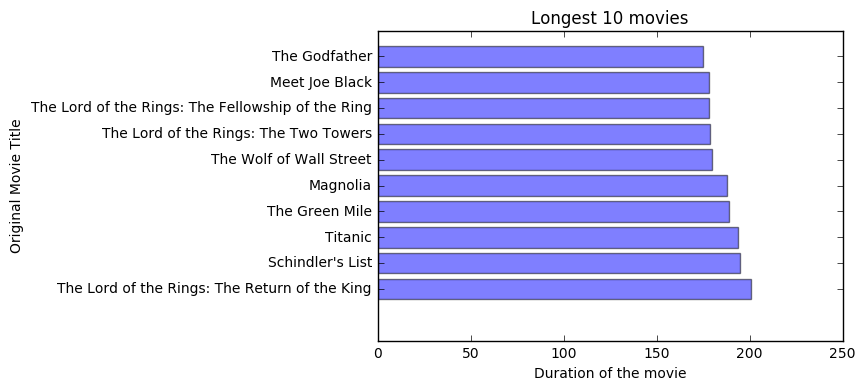

In [26]:


y_pos = np.arange(len(title))


plt.barh(y_pos, run, align='center', alpha=0.5)
plt.yticks(y_pos, title)
plt.xlabel('Duration of the movie')
plt.ylabel('Original Movie Title')
plt.title('Longest 10 movies')

plt.show()

### Research Question 2  (what are the top 10 years in releasing movies)

#### To answer this question we need to count the first 10 values of release_year column 

### Code

In [27]:
top_releasing_years = movies_df_copy['release_year'].value_counts()[0:10]
top_releasing_years

2011    156
2010    132
2009    116
2015     93
2007     92
2012     88
2008     82
2014     70
2006     68
2013     65
Name: release_year, dtype: int64

### visualizing Data

#### we will visualiz the number of released movies (on the y-axis) and the releas year of the movie (on the x-axis)

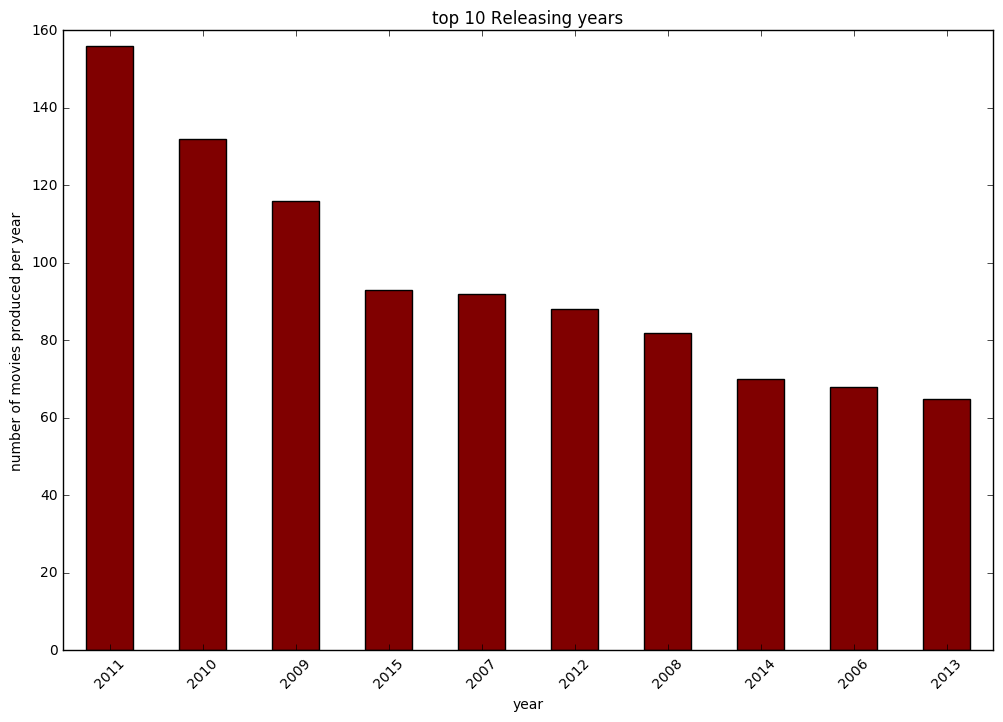

In [28]:


top_releasing_years.plot(kind='bar',color='maroon',figsize=(12,8))

plt.title('top 10 Releasing years')
plt.xlabel('year')
plt.ylabel('number of movies produced per year')
plt.xticks(rotation= 45);

In [29]:
movies_df_copy.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


### Research Question 3 (who are the top 10 directors by number of directed movies)

#### To answer this question we need to count the first 10 values of director column 

### Code


In [30]:
top_directors = movies_df_copy['director'].value_counts()[0:10]
top_directors


John Carpenter        12
Steven Spielberg      11
Steven Soderbergh     10
Clint Eastwood         8
Ridley Scott           8
Robert Zemeckis        8
Peter Jackson          8
Christopher Nolan      7
Paul W.S. Anderson     7
Ron Howard             7
Name: director, dtype: int64

### visualizing Data

#### we will visualiz the name of the director (on the y-axis) and the number of the directed movies (on the x-axis)

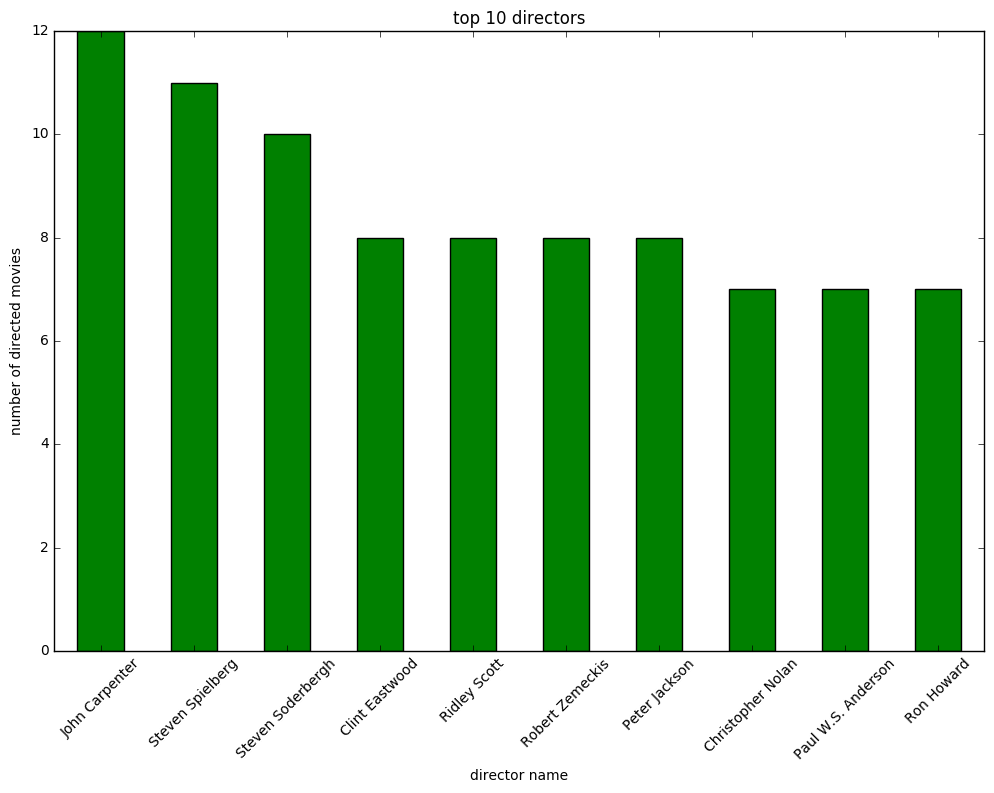

In [31]:
top_directors.plot(kind='bar',color='green',figsize=(12,8))

plt.title('top 10 directors')
plt.xlabel('director name')
plt.ylabel('number of directed movies')
plt.xticks(rotation= 45);


#### now we will check the relationship between the legnth of the movie and profit

### Research Question 4: (is there any relationship between run time and movies profit?)



#### since the answer for this question and the next question will be emphasized using scatter plot so we are going to create  function to avoid repetitive code and make our life easier

In [32]:
def plt_scatter(x,y):
    return movies_df_copy.plot(x=x, y=y ,kind='scatter', figsize=(10,5), color='blue');

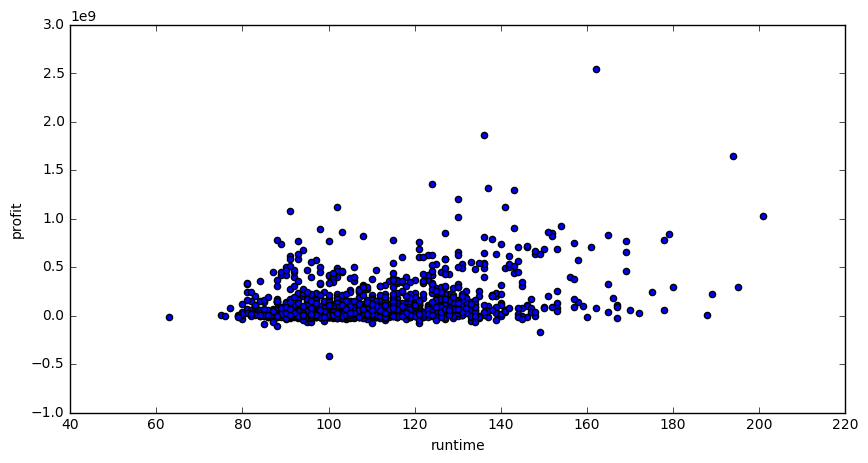

In [33]:
plt_scatter('runtime','profit');

### Research Question 5 : (is there any relationship between vote average and movies profit ?)

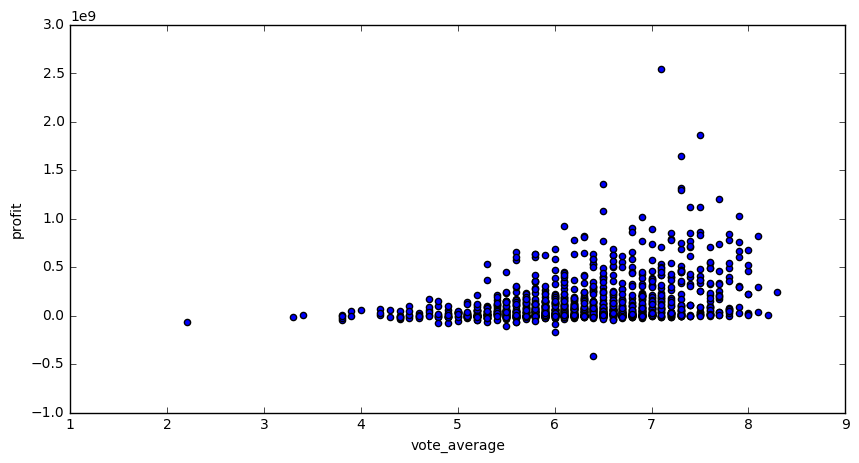

In [34]:
plt_scatter('vote_average','profit');

#### To Answer the Next 2 questions we need to create a function that calculate the mean of the given column and customize it to a specific period according the question 

In [35]:
def calculate_mean_of_column(start_year,end_year , col):
    if col == 'vote_average':
        v = movies_df_copy[(movies_df_copy.release_year >= start_year) & (movies_df_copy.release_year <= end_year)].vote_average
    elif col == 'runtime':
         v = movies_df_copy[(movies_df_copy.release_year >= start_year) & (movies_df_copy.release_year <= end_year)].runtime

    return v.mean()

### Research Question 6: what is the average rate for the released movies between 2000 and 2015 ?

In [36]:
calculate_mean_of_column(2000,2015 , 'vote_average')

6.2225919439579656

### Research Question 7 :what is the average movie length for the released movies between 1900 and 2000 ?

In [37]:
calculate_mean_of_column(1900,2000 , 'runtime')

115.85534591194968

<a id='conclusions'></a>
## Conclusions

#### at first we started our data analysis process to get the 10 longest movies from 1960 to 2015 and we came th the conclusion that 

#### "The Lord of the Rings: The Return of the King" is the longest movie in this dataset with "201 minutes" then we moved to get top 

#### 10 years in releasing movies and we can easily see that "2011" has the highest number of released movies with "156 released 

#### movies" , regrding the top 10 directors with the highest number of directed movies we can see that "John Carpenter" has 12 

#### directed movies ,talking about releationships we created a profit column to figure out the answer of the relationship between 

#### the length of the movie and the profit so we came to the conclusion that the hieghst profit movies were with a runtime more than 

#### 2 hours also in my attempt to figure out the relationship between the profit of movies and the average of votes i can notice 

#### that movies with the vote average more than 5 are making higher profit than movies with lower vote average , the average rate 

#### for movies from 2000 to 2015 is "6.22" and the average movie length for the movies from 1900 to 2000 is "116 minutes" 


## Limitations

#### we faced various types of limitations first we noticed that dataset "released_date" is not loaded properly "years are shortened to 

#### 2 characters only "so we cleaned the data and removed the shortened year then concatenated the "release_year" with 

#### "release_date" column to fix that issue then we noticed that our data has 0 values in the revenue , budget and reuntime columns 

#### so we replaced those values with NAN to drop them using dropna function then we weren't able to answer the 4th and the 5th 

#### questions with the given columns so we created profit column to be able to answer those questions